In [1]:
import matplotlib.pyplot as plt

from submodules.CreateSyntheticEventV3 import __create_synthetic_event_v3
from submodules.MakeplotTraceAndSpectrum import __makeplot_trace_and_spectrum
from submodules.CreateLinearChirp import __create_linear_chirp

In [2]:
T = 500
fs = 10; sps = fs

f_lower, f_upper = 0.01, .1


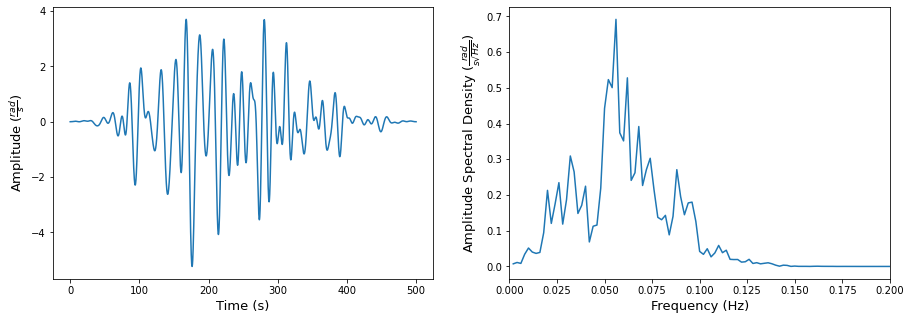

In [3]:
event, event_time =__create_synthetic_event_v3( T,
                                                sps,
                                                f_lower,
                                                f_upper,
                                                noise_level=None,
                                               )

__makeplot_trace_and_spectrum(event, event_time, fmax=2*f_upper);

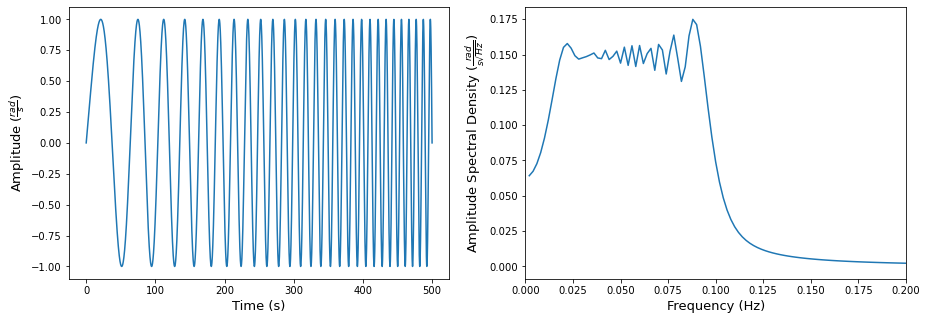

In [4]:
chirp, t = __create_linear_chirp(T, sps, f_lower, f_upper)

__makeplot_trace_and_spectrum(chirp, t, fmax=2*f_upper );

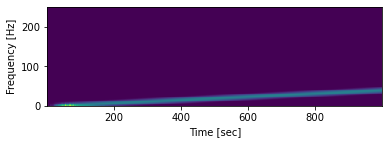

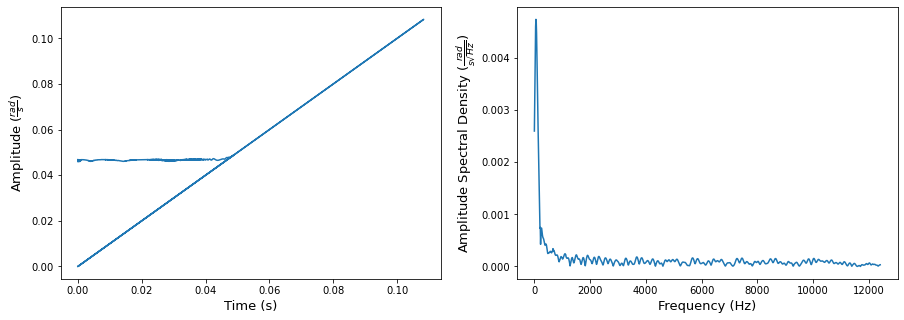

In [5]:
import numpy as np
import matplotlib.pyplot as plt

from lspopt.lsp import spectrogram_lspopt


T = 1000
fs = 500; sps = fs

f_lower, f_upper = 0.01, 40.0

x, t = __create_linear_chirp(T, sps, f_lower, f_upper)
plt.plot(t,x)


f, t, Sxx2 = spectrogram_lspopt(x, fs, c_parameter=20.0)

ax = plt.subplot(212)
ax.pcolormesh(t, f, Sxx2, shading='auto')
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax.set_ylim(0,0.5*fs)

plt.show()

instaf = []
for i in range(len(Sxx2[1,:])):
    instaf.append(max(Sxx2[:,i]))
t = Sxx2[1,:]

__makeplot_trace_and_spectrum(instaf, t);

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from lspopt.lsp import spectrogram_lspopt


T = 1000
fs = 50; sps = fs

f_lower, f_upper = 0.01, 0.1

x, tt = __create_synthetic_event_v3( T,
                                    sps,
                                    f_lower,
                                    f_upper,
                                    noise_level=None,
                                   )

x*=1e-7


Modulation option 3 is executed ...

 --> integrating ... 

 elapsed time: 1.03 sec


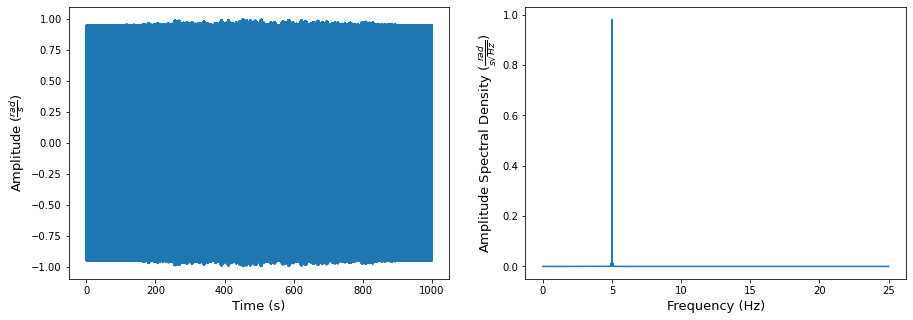

In [54]:
from submodules.Modulation import __modulation
from submodules.Tapering import __tapering

synthetic_signal, timeline = __modulation(x, tt, 5, T, fs, 1e4, case=3)

# synthetic_signal = __tapering(synthetic_signal, "flanks", percent=10)

__makeplot_trace_and_spectrum(synthetic_signal, timeline);



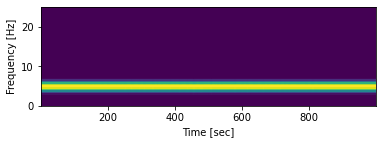

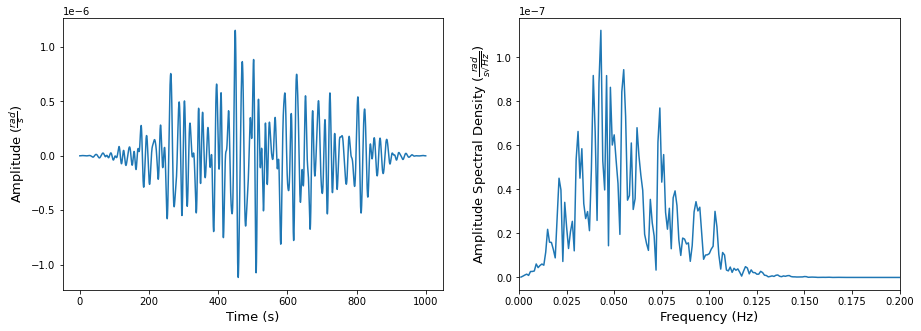

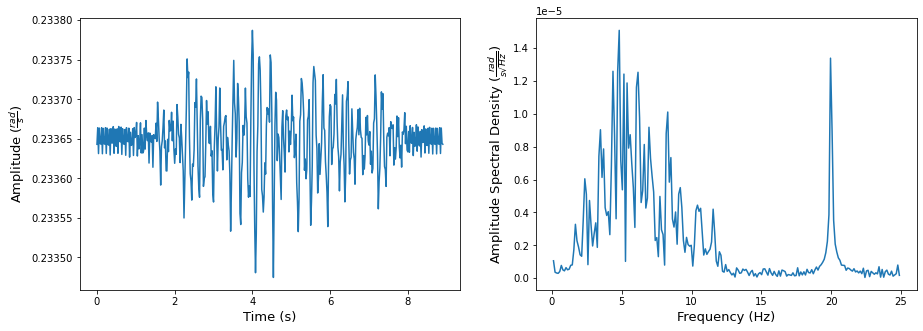

In [56]:
f, t, Sxx = spectrogram_lspopt(synthetic_signal, fs, c_parameter=20.0, nperseg=128)

ax = plt.subplot(212)
ax.pcolormesh(t, f, Sxx, shading='auto')
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax.set_ylim(0,0.5*fs)


instaf = []
for i in range(len(Sxx[1,:])):
    instaf.append(max(Sxx[:,i]))
t = Sxx2[1,:]
t = np.arange(0, len(instaf)/fs, 1/fs)


__makeplot_trace_and_spectrum(x, tt, fmax=2*f_upper);
__makeplot_trace_and_spectrum(instaf, t);